In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

           column_name  percent_missing
StationId    StationId         0.000000
Date              Date         0.000000
PM2.5            PM2.5        20.016661
PM10              PM10        39.529782
NO                  NO        15.833758
NO2                NO2        15.316333
NOx                NOx        14.347202
NH3                NH3        44.527237
CO                  CO        12.031286
SO2                SO2        23.329477
O3                  O3        23.666404
Benzene        Benzene        29.115564
Toluene        Toluene        35.823576
Xylene          Xylene        78.805017
AQI                AQI        19.447401
AQI_Bucket  AQI_Bucket        19.447401


In [5]:
df.dropna(subset=['AQI','PM2.5','NO','NO2','NOx','CO'],inplace=True)

In [6]:
df=df.drop('Xylene',axis=1)

In [7]:
df.fillna({col: df[col].mean() for col in ['PM10', 'NH3', 'SO2','O3','Benzene','Toluene']}, inplace=True)


In [8]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000
mean,80.514639,163.242192,23.619958,35.580280,43.733193,29.144216,1.642633,12.496005,38.670855,3.674694,17.109852,184.145559
std,75.083300,107.573221,34.827221,29.116854,45.526119,19.837258,4.337564,11.704266,38.914398,10.667427,26.586691,132.664507
min,0.150000,0.080000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,10.000000
25%,32.320000,91.540000,4.780000,15.570000,15.880000,17.850000,0.610000,5.840000,20.130000,0.450000,2.100000,89.000000
50%,56.730000,163.242192,10.480000,27.790000,28.610000,29.144216,0.960000,10.520000,33.140000,2.290000,13.660000,137.000000
75%,100.460000,175.500000,25.630000,47.470000,52.940000,31.210000,1.490000,14.440000,45.775000,3.674694,17.109852,263.000000
max,995.000000,976.770000,437.850000,448.050000,434.900000,365.680000,175.810000,186.080000,963.000000,455.030000,454.850000,2049.000000


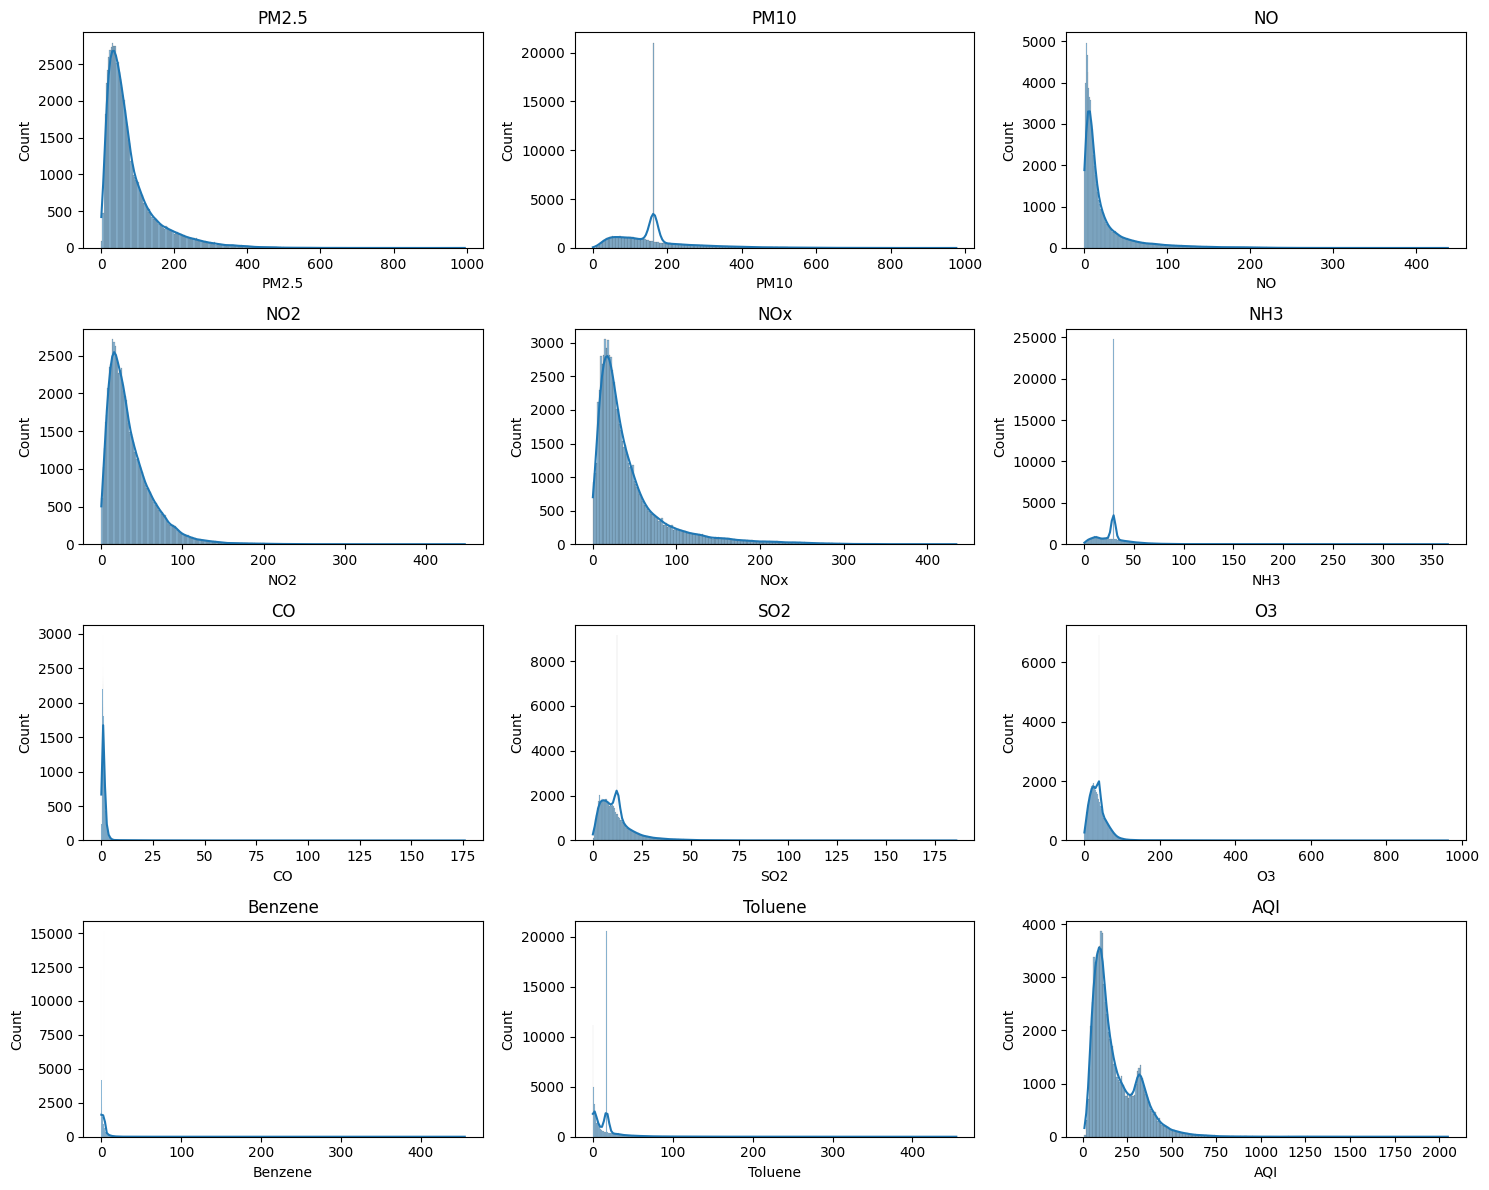

In [9]:
cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols, 1):  # start index from 1 for subplot
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

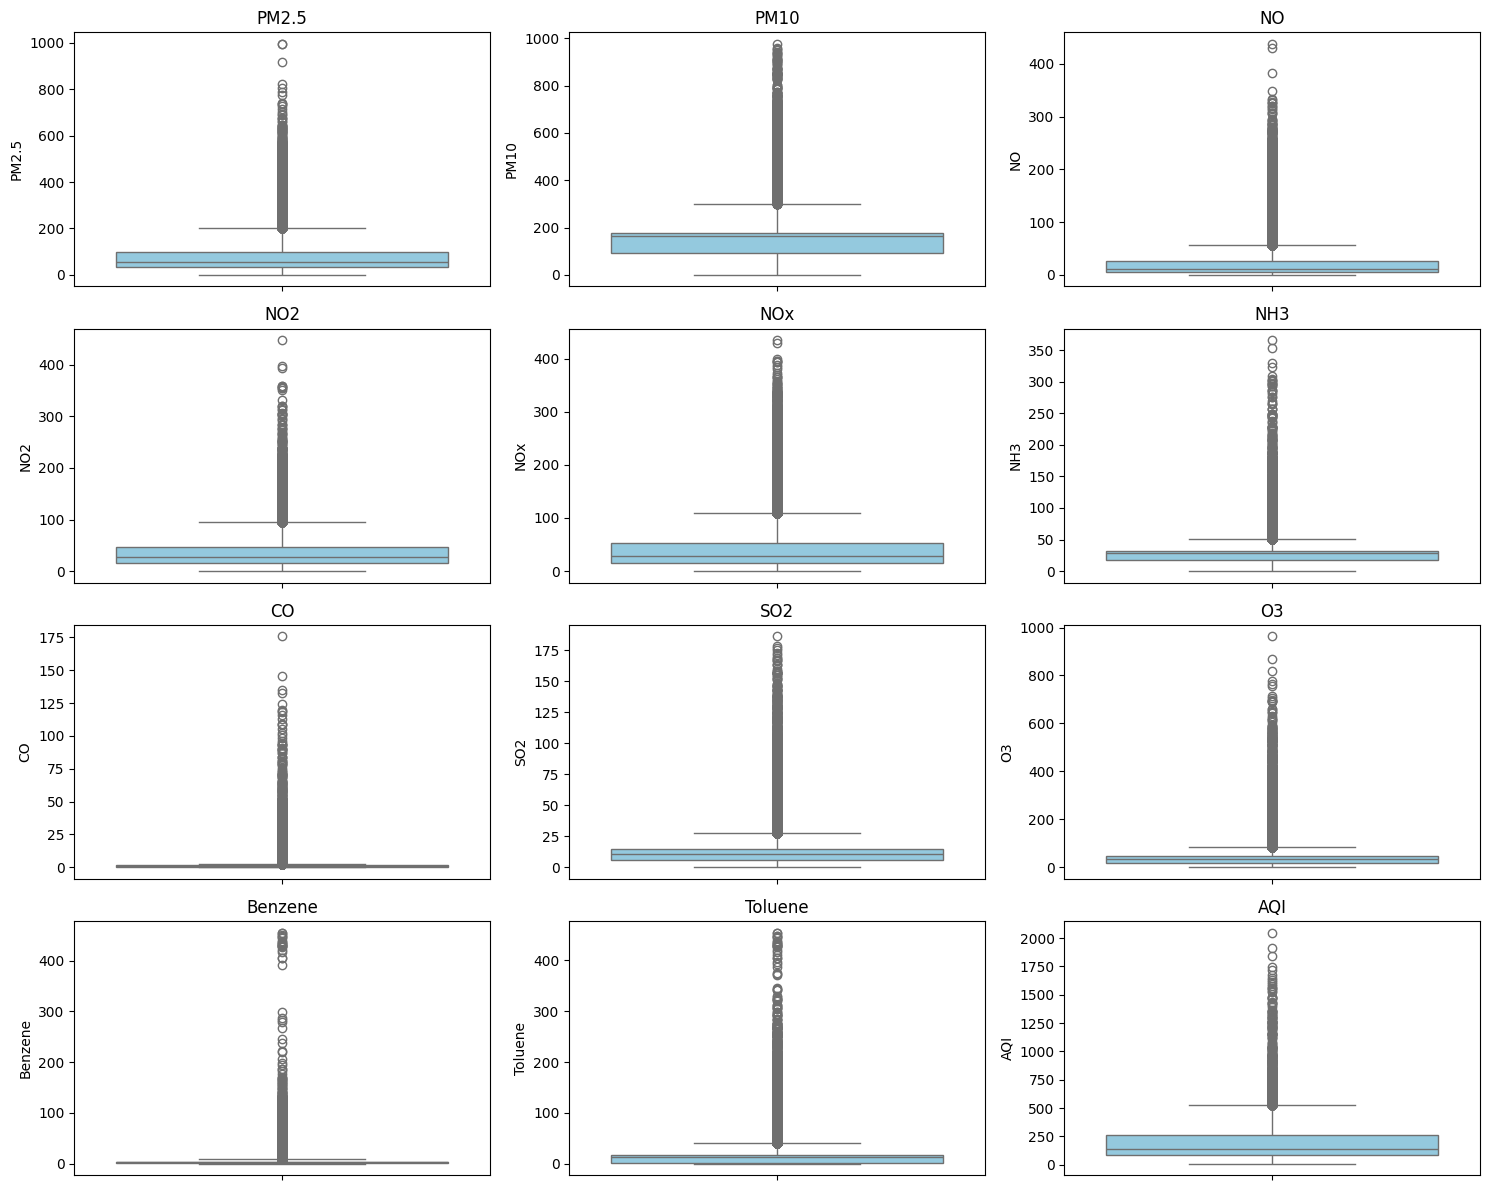

In [10]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, y=col, color='skyblue')  # y=col for vertical boxplot
    plt.title(col)

plt.tight_layout()
plt.show()

In [11]:
q2_pm2=df['PM2.5'].quantile(0.25)
q2_pm10=df['PM10'].quantile(0.25)
q2_no=df['NO'].quantile(0.25)
q2_no2=df['NO2'].quantile(0.25)
q2_nox=df['NOx'].quantile(0.25)
q2_nh3=df['NH3'].quantile(0.25)
q2_co=df['CO'].quantile(0.25)
q2_so2=df['SO2'].quantile(0.25)
q2_o3=df['O3'].quantile(0.25)
q2_ben=df['Benzene'].quantile(0.25)
q2_tol=df['Toluene'].quantile(0.25)
q2_aqi=df['AQI'].quantile(0.25)

q3_pm2=df['PM2.5'].quantile(0.75)
q3_pm10=df['PM10'].quantile(0.75)
q3_no=df['NO'].quantile(0.75)
q3_no2=df['NO2'].quantile(0.75)
q3_nox=df['NOx'].quantile(0.75)
q3_nh3=df['NH3'].quantile(0.75)
q3_co=df['CO'].quantile(0.75)
q3_so2=df['SO2'].quantile(0.75)
q3_o3=df['O3'].quantile(0.75)
q3_ben=df['Benzene'].quantile(0.75)
q3_tol=df['Toluene'].quantile(0.75)
q3_aqi=df['AQI'].quantile(0.75)

In [12]:
iqr_pm2=q3_pm2-q2_pm2
iqr_pm10=q3_pm10-q2_pm10
iqr_no=q3_no-q2_no
iqr_no2=q3_no2-q2_no2
iqr_nox=q3_nox-q2_nox
iqr_nh3=q3_nh3-q2_nh3
iqr_co=q3_co-q2_co
iqr_so2=q3_so2-q2_so2
iqr_o3=q3_o3-q2_o3
iqr_ben=q3_ben-q2_ben
iqr_tol=q3_tol-q2_tol
iqr_aqi=q3_aqi-q2_aqi

In [13]:
u_pm2=q3_pm2+ 1.5 *iqr_pm2
u_pm10=q3_pm10+ 1.5 *iqr_pm10
u_no=q3_no+ 1.5 *iqr_no
u_no2=q2_no2+ 1.5 *iqr_no2
u_nox=q3_nox+ 1.5 *iqr_nox
u_nh3=q3_nh3+ 1.5 *iqr_nh3
u_co=q3_co+ 1.5 *iqr_co
u_so2=q3_so2+ 1.5 *iqr_so2
u_o3=q3_o3+ 1.5 *iqr_o3
u_ben=q3_ben+ 1.5 *iqr_ben
u_tol=q3_tol+ 1.5 *iqr_tol
u_aqi=q3_aqi+ 1.5 *iqr_aqi

l_pm2=q3_pm2- 1.5 *iqr_pm2
l_pm10=q3_pm10- 1.5 *iqr_pm10
l_no=q3_no- 1.5 *iqr_no
l_no2=q2_no2- 1.5 *iqr_no2
l_nox=q3_nox-1.5 *iqr_nox
l_nh3=q3_nh3- 1.5 *iqr_nh3
l_co=q3_co- 1.5 *iqr_co
l_so2=q3_so2- 1.5 *iqr_so2
l_o3=q3_o3- 1.5 *iqr_o3
l_ben=q3_ben- 1.5 *iqr_ben
l_tol=q3_tol- 1.5 *iqr_tol
l_aqi=q3_aqi- 1.5 *iqr_aqi

In [14]:
df[df['NO2']>u_no2]

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
33,AP001,2017-12-27,104.81,192.20,9.59,63.48,41.57,21.06,0.23,17.01,63.87,0.38,4.10,259.0,Poor
34,AP001,2017-12-28,89.95,175.16,10.95,64.53,43.23,18.87,0.27,15.52,62.49,0.36,4.12,225.0,Poor
352,AP001,2018-11-11,68.25,129.41,15.11,65.00,46.85,3.53,1.22,25.14,30.30,0.08,0.29,120.0,Moderate
353,AP001,2018-11-12,84.48,164.24,14.25,80.74,54.62,3.19,1.21,30.44,33.39,0.10,0.39,156.0,Moderate
354,AP001,2018-11-13,77.38,173.47,22.55,75.54,58.58,4.88,1.15,30.69,35.94,0.09,0.29,182.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107924,WB013,2020-03-13,54.34,102.54,16.12,64.18,80.29,24.71,1.72,13.09,60.23,8.20,18.03,181.0,Moderate
107928,WB013,2020-03-17,61.39,127.08,36.47,69.68,106.23,23.23,1.67,13.73,74.43,12.60,23.42,183.0,Moderate
107929,WB013,2020-03-18,76.09,162.90,37.45,89.01,126.46,29.58,2.06,12.49,67.21,11.44,23.80,174.0,Moderate
107930,WB013,2020-03-19,75.32,168.54,59.30,83.79,142.93,22.77,1.77,16.21,60.31,10.55,23.06,214.0,Poor


In [15]:
df[df['NO2']<l_no2]

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket


In [16]:
new_df_cap = df.copy()

new_df_cap['NO'] = np.where(
    new_df_cap['NO'] > u_no,
    u_no,
    np.where(
        new_df_cap['NO'] < l_no,
          l_no,
        new_df_cap['NO']
    )
)

new_df_cap['PM2.5'] = np.where(
    new_df_cap['PM2.5'] > u_pm2,
    u_pm2,
    np.where(
        new_df_cap['PM2.5'] < l_pm2,
          l_pm2,
        new_df_cap['PM2.5']
    )
)

new_df_cap['PM10'] = np.where(
    new_df_cap['PM10'] > u_pm10,
    u_pm10,
    np.where(
        new_df_cap['PM10'] < l_pm10,
          l_pm10,
        new_df_cap['PM10']
    )
)

new_df_cap['NO2'] = np.where(
    new_df_cap['NO2'] > u_no2,
    u_no2,
    np.where(
        new_df_cap['NO2'] < l_no2,
          l_no2,
        new_df_cap['NO2']
    )
)

new_df_cap['NOx'] = np.where(
    new_df_cap['NOx'] > u_nox,
    u_nox,
    np.where(
        new_df_cap['NOx'] < l_nox,
          l_nox,
        new_df_cap['NOx']
    )
)

new_df_cap['NH3'] = np.where(
    new_df_cap['NH3'] > u_nh3,
    u_nh3,
    np.where(
        new_df_cap['NH3'] < l_nh3,
          l_nh3,
        new_df_cap['NH3']
    )
)

new_df_cap['CO'] = np.where(
    new_df_cap['CO'] > u_co,
    u_co,
    np.where(
        new_df_cap['CO'] < l_co,
          l_co,
        new_df_cap['CO']
    )
)

new_df_cap['SO2'] = np.where(
    new_df_cap['SO2'] > u_so2,
    u_so2,
    np.where(
        new_df_cap['SO2'] < l_so2,
          l_so2,
        new_df_cap['SO2']
    )
)

new_df_cap['O3'] = np.where(
    new_df_cap['O3'] > u_o3,
    u_o3,
    np.where(
        new_df_cap['O3'] < l_o3,
          l_o3,
        new_df_cap['O3']
    )
)

new_df_cap['Benzene'] = np.where(
    new_df_cap['Benzene'] > u_ben,
    u_ben,
    np.where(
        new_df_cap['Benzene'] < l_ben,
          l_ben,
        new_df_cap['Benzene']
    )
)

new_df_cap['Toluene'] = np.where(
    new_df_cap['Toluene'] > u_tol,
    u_tol,
    np.where(
        new_df_cap['Toluene'] < l_tol,
          l_tol,
        new_df_cap['Toluene']
    )
)

new_df_cap['AQI'] = np.where(
    new_df_cap['AQI'] > u_aqi,
    u_aqi,
    np.where(
        new_df_cap['AQI'] < l_aqi,
          l_aqi,
        new_df_cap['AQI']
    )
)

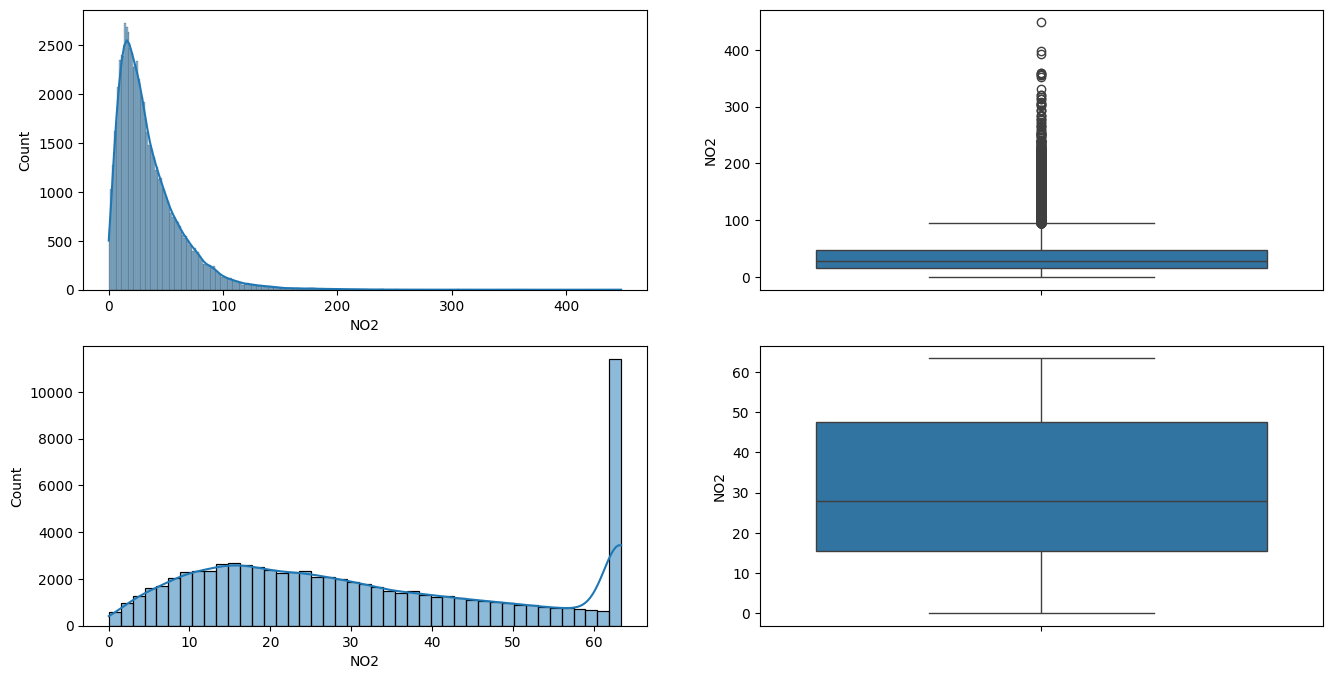

In [17]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['NO2'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['NO2'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['NO2'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['NO2'])

plt.show()

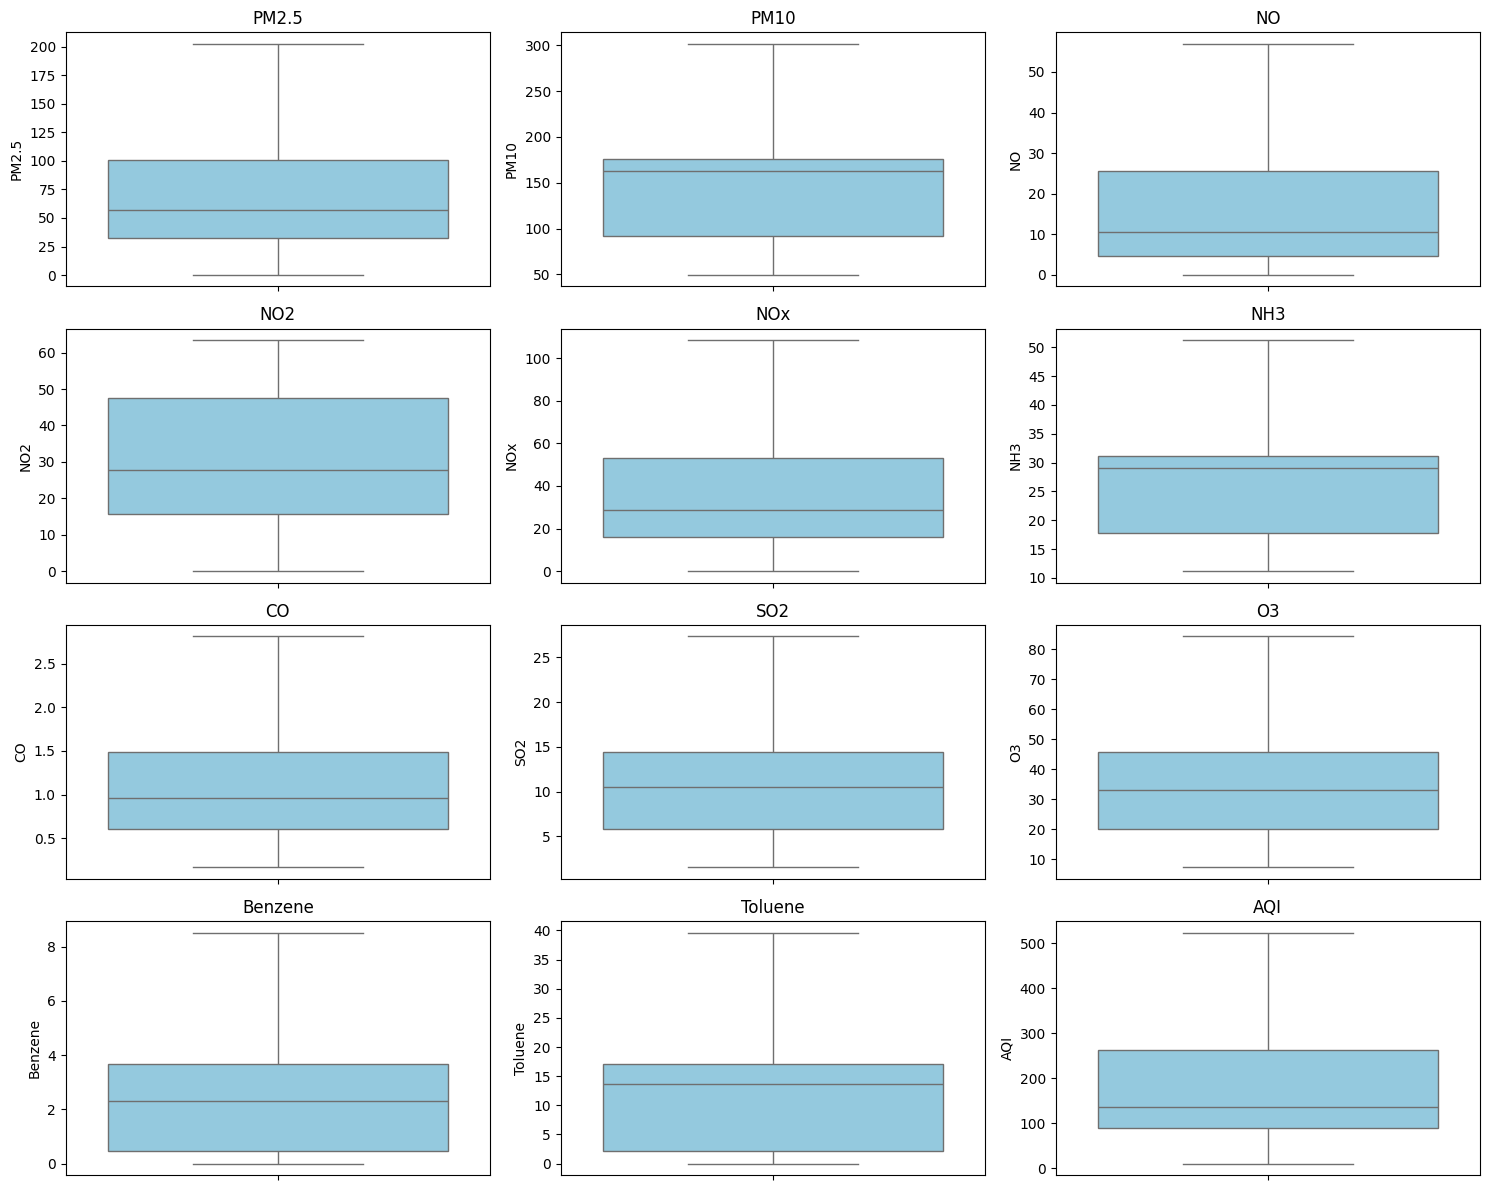

In [18]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=new_df_cap, y=col, color='skyblue')  # y=col for vertical boxplot
    plt.title(col)

plt.tight_layout()
plt.show()

In [19]:
new_df_cap.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000,77343.000000
mean,74.431624,153.484765,18.219499,31.724086,39.004300,27.744652,1.144166,11.379063,35.581691,2.735221,13.416419,181.448664
std,55.992944,75.072579,18.072734,19.321047,30.961205,11.896626,0.721495,7.048415,20.139559,2.524314,12.091253,120.970949
min,0.150000,49.560000,0.020000,0.010000,0.000000,11.170000,0.170000,1.540000,7.307500,0.000000,0.000000,10.000000
25%,32.320000,91.540000,4.780000,15.570000,15.880000,17.850000,0.610000,5.840000,20.130000,0.450000,2.100000,89.000000
50%,56.730000,163.242192,10.480000,27.790000,28.610000,29.144216,0.960000,10.520000,33.140000,2.290000,13.660000,137.000000
75%,100.460000,175.500000,25.630000,47.470000,52.940000,31.210000,1.490000,14.440000,45.775000,3.674694,17.109852,263.000000
max,202.670000,301.440000,56.905000,63.420000,108.530000,51.250000,2.810000,27.340000,84.242500,8.511734,39.624629,524.000000


In [20]:
new_df_cap.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,11.17,0.17,15.24,84.2425,0.20,6.50,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,11.17,0.17,26.96,84.2425,0.22,7.95,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.17,27.34,84.2425,0.29,7.63,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.17,19.00,84.2425,0.17,5.02,188.0,Moderate
5,AP001,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.17,10.55,84.2425,0.21,4.71,173.0,Moderate


In [21]:
new_df_cap[cols].corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
PM2.5,1.000000,0.742382,0.539276,0.489595,0.513481,0.420666,0.503766,0.299413,0.057879,0.364291,0.292345,0.882325
PM10,0.742382,1.000000,0.476163,0.442878,0.473653,0.455916,0.470067,0.285871,0.056191,0.323451,0.275127,0.727779
NO,0.539276,0.476163,1.000000,0.578787,0.868237,0.301550,0.485508,0.301682,-0.103588,0.373692,0.328200,0.539799
NO2,0.489595,0.442878,0.578787,1.000000,0.739143,0.317581,0.364151,0.342231,0.155684,0.372635,0.350291,0.508470
NOx,0.513481,0.473653,0.868237,0.739143,1.000000,0.319657,0.446677,0.312989,-0.007052,0.373574,0.303143,0.532145
NH3,0.420666,0.455916,0.301550,0.317581,0.319657,1.000000,0.330771,0.214217,0.050580,0.177120,0.223406,0.427813
CO,0.503766,0.470067,0.485508,0.364151,0.446677,0.330771,1.000000,0.305794,0.013411,0.279141,0.288508,0.589788
SO2,0.299413,0.285871,0.301682,0.342231,0.312989,0.214217,0.305794,1.000000,0.181571,0.238420,0.322306,0.372165
O3,0.057879,0.056191,-0.103588,0.155684,-0.007052,0.050580,0.013411,0.181571,1.000000,0.044379,0.021051,0.117003
Benzene,0.364291,0.323451,0.373692,0.372635,0.373574,0.177120,0.279141,0.238420,0.044379,1.000000,0.642358,0.369016


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
df.columns


Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [24]:
y = df['AQI']  # Target variable
x = df.drop(columns=['AQI','StationId', 'Date','AQI_Bucket'])  # Features

In [25]:
scaler = StandardScaler().fit(x)
new_x = scaler.transform(x)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test=train_test_split(new_x,y,random_state=42,test_size=0.2)

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model=RandomForestRegressor(n_estimators=100,random_state=42)

In [30]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
y_pred = model.predict(x_test)

# 5. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R²):", r2)


Mean Absolute Error (MAE): 20.81284827719956
Mean Squared Error (MSE): 1283.1288317473657
Root Mean Squared Error (RMSE): 35.820787704172076
R-squared Score (R²): 0.9282571351198852


In [33]:
r2 = r2_score(y_test, y_pred)
accuracy_percent = r2 * 100
print(f"Model Accuracy: {accuracy_percent:.2f}%")

Model Accuracy: 92.83%


In [34]:
import pickle

In [35]:
with open("model_random.pkl", "wb") as file:
    pickle.dump(model, file)